#**IMPORT PYTHON PACKAGES**

In [5]:
#IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [4]:
#PACKAGE UNTUK CONNECT G-DRIVE N G-COLLAB 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#LOAD DATASET
dataset_customers = pd.read_csv('/content/drive/MyDrive/Dataset/customers_dataset.csv')
dataset_geolocation = pd.read_csv('/content/drive/MyDrive/Dataset/geolocation_dataset.csv')
dataset_items = pd.read_csv('/content/drive/MyDrive/Dataset/order_items_dataset.csv')
dataset_payments = pd.read_csv('/content/drive/MyDrive/Dataset/order_payments_dataset.csv')
dataset_reviews = pd.read_csv('/content/drive/MyDrive/Dataset/order_reviews_dataset.csv')
dataset_orders = pd.read_csv('/content/drive/MyDrive/Dataset/orders_dataset.csv')
dataset_product_category = pd.read_csv('/content/drive/MyDrive/Dataset/product_category_name_translation.csv')
dataset_product = pd.read_csv('/content/drive/MyDrive/Dataset/products_dataset.csv')
dataset_seller = pd.read_csv('/content/drive/MyDrive/Dataset/sellers_dataset.csv')

#DATA PREPROCESSING
#combine all the dataset_combine
dataset_combine = [dataset_customers, dataset_geolocation, dataset_items, dataset_payments, dataset_reviews, dataset_orders, dataset_product_category, dataset_product, dataset_seller  ]
for i in dataset_combine:
    i.dropna(inplace=True)

desc_dataset = pd.DataFrame({},)
desc_dataset['columns'] = [', '.join([col for col in data.columns ]) for data in dataset_combine]
desc_dataset['row']= [data.shape[0] for data in dataset_combine]
desc_dataset['coloumns']= [data.shape[1] for data in dataset_combine]
desc_dataset['data_duplicate']= [data.duplicated().sum() for data in dataset_combine]
desc_dataset['data_null']= [data.isnull().sum().sum() for data in dataset_combine]
desc_dataset['null'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in dataset_combine]
desc_dataset.style.background_gradient(cmap='inferno')

,columns,row,coloumns,data_duplicate,data_null,null
0,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9839,7,0,0,
5,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,"product_category_name, product_category_name_english",71,2,0,0,
7,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
8,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,


In [7]:
#MERGE DATASET
df = pd.merge(dataset_customers,dataset_orders, on="customer_id")
df = df.merge(dataset_payments, on ="order_id")
df = df.merge(dataset_reviews, on="order_id")
df = df.merge(dataset_items, on="order_id")
df = df.merge(dataset_product, on="product_id")
df = df.merge(dataset_seller, on="seller_id")
df = df.merge(dataset_product_category, on="product_category_name")
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP,home_confort
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP,home_confort
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,...,176.0,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,...,176.0,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,...,176.0,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach
11574,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach
11575,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach
11576,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach


# RFM ANALYSIS
Analyze bas on 3 variable : Recency Frequency and Monetary Value



In [8]:
import datetime as dt
from datetime import datetime

temp = df['order_purchase_timestamp']
df['order_purchase_timestamp'] =  pd.to_datetime(df['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
df['order_purchase_timestamp'] 

0       2018-07-29 09:51:30
1       2018-07-18 17:21:49
2       2018-05-22 12:27:08
3       2018-06-05 12:14:43
4       2018-08-13 11:18:25
                ...        
11573   2018-06-15 12:52:05
11574   2018-06-15 12:52:05
11575   2018-06-15 12:52:05
11576   2018-06-15 12:52:05
11577   2018-05-15 16:45:05
Name: order_purchase_timestamp, Length: 11578, dtype: datetime64[ns]

In [10]:
#Define current date (1 day after the last date in the dataset)
current_date = df['order_purchase_timestamp'].max() + dt.timedelta(days = 1)

#Show "current" date
print(f"Current date is: {current_date}")

Current date is: 2018-08-30 14:18:28


In [11]:
#Obtain the date of the most recent purchase in a new dataframe
recency_df = df.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()

#Show results
recency_df.nunique()

customer_unique_id          9333
order_purchase_timestamp    9325
dtype: int64

In [12]:
#Obtain recency value for each customer adding new column
recency_df['order_purchase_timestamp']=pd.to_datetime(recency_df['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
recency_df['recency'] = recency_df['order_purchase_timestamp'].apply(lambda x: (current_date - x).days)

recency_df


,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,9
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,33
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,5
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,121
...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,64
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,127
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,132
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,41


# Frequency

In [13]:
#Obtain the number of unique orders by customer in a new dataframe
frequency_df = pd.DataFrame(df.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

#Rename column to 'frequency'
frequency_df.rename(columns={"order_id":"frequency"}, inplace=True)

#Show results
frequency_df.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,000ec5bff359e1c0ad76a81a45cb598f,1
2,00172711b30d52eea8b313a7f2cced02,1
3,001928b561575b2821c92254a2327d06,1
4,0019e8c501c85848ac0966d45226fa1d,1


Monetary

In [14]:
#Calculate payment value group by customer id in a new dataframe
monetary_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

#Rename 'payment value' column to 'monetary'
monetary_df.rename(columns={"payment_value":"monetary"}, inplace=True)

#Show results
monetary_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,27.75
2,00172711b30d52eea8b313a7f2cced02,122.07
3,001928b561575b2821c92254a2327d06,329.62
4,0019e8c501c85848ac0966d45226fa1d,197.27


# Merge Dataframe

In [16]:
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')

rfm_df

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,9,1,27.75
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,33,1,122.07
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,5,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,121,1,197.27
...,...,...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,64,1,93.11
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,127,1,72.76
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,132,1,200.90
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,41,1,82.51


# Values Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

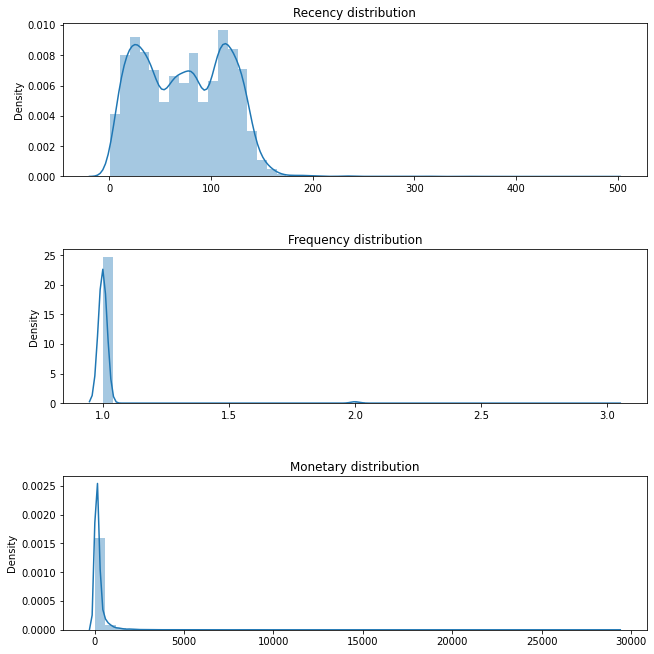

In [17]:
plt.figure(figsize=(10, 10))
#Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

In [18]:
rfm_df

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,9,1,27.75
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,33,1,122.07
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,5,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,121,1,197.27
...,...,...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,64,1,93.11
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,127,1,72.76
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,132,1,200.90
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,41,1,82.51


# Create RFM Score

I'm going to use five quintiles.
5 is the most recent, highest number transaction and highest monetarty value

In [19]:
#Using qcut function to discretize variables into equal-sized buckets
rfm_df["recency_score"] = pd.qcut(rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df["monetary_score"] = pd.qcut(rfm_df['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_df['frequency'].value_counts(normalize=True)*100

1    98.939248
2     1.017893
3     0.042859
Name: frequency, dtype: float64

In [21]:
#Function for parse values and apply
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

rfm_df['frequency_score'] = rfm_df['frequency'].apply(parse_values)



In [22]:
#Merge
rfm_df['rfm_score'] = rfm_df.recency_score.astype(str)+ rfm_df.frequency_score.astype(str) + rfm_df.monetary_score.astype(str)

rfm_df.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90,2,3,1,213
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,9,1,27.75,5,1,1,511
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,33,1,122.07,4,3,1,413
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,5,1,329.62,5,5,1,515
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,121,1,197.27,1,4,1,114


# **THE SEGMENTATION**
I choose this RFM segementation with this desc:
*   Champions : Bought recently, order often and spend the most.
*   Loyal : Orders regularly. Responsive to promotions.
*   Potential Loyalists : Recent customers who spent good amounts.
*   Promising : Potential loyalist a few months ago. Spends frequently and a good amount. But the last purchase was several weeks ago.
*   Need attention : Core customers whose last purchase happened more than one month ago.
*   About to sleep : Made their last purchase a long time ago but in the last 4 weeks either visited the site or opened an email.
*   Cannot Lose Them : Made the largest orders, and often. But haven’t returned for a long time
*   At Risk : Similar to 'Cannot Lose Them' but with smaller monetary and frequency value.
*   Hibernating customers : Customers who made smaller and infrequent purchases before but haven't purchased anything in a long time.
*   Lost : Made last purchase long time ago and didn’t engage at all in the last 4 weeks.













In [23]:
#The code dictionary with scores
segments = {
    '111|112|121|131|141|151': 'Lost customers','332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    '155|154|144|214|215|115|114|113': 'Cannot Lose Them','255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk', '331|321|312|221|213|231|241|251': 'About To Sleep',
    '535|534|443|434|343|334|325|324': 'Need Attention','525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    '512|511|422|421|412|411|311': 'New Customers','553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    '543|444|435|355|354|345|344|335': 'Loyal','555|554|544|545|454|455|445': 'Champions'
}

rfm_df['segment'] = rfm_df['rfm_score'].replace(segments, regex=True)

#Show results
rfm_df.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90,2,3,1,213,About To Sleep
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,9,1,27.75,5,1,1,511,New Customers
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,33,1,122.07,4,3,1,413,Promising
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,5,1,329.62,5,5,1,515,Promising
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,121,1,197.27,1,4,1,114,Cannot Lose Them


In [24]:
#Calculate some calculations grouping each segment
rfm_statistics = rfm_df[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])

rfm_statistics

recency                        frequency             \
                             mean median  min  max count      mean median min   
segment                                                                         
About To Sleep          89.079208   88.0   60  116   707  1.002829    1.0   1   
At Risk                109.000000  108.5   90  128    20  2.100000    2.0   2   
Cannot Lose Them       121.145370  120.0   88  482  1933  1.000000    1.0   1   
Hibernating customers  103.894879  105.0   72  159   742  1.008086    1.0   1   
Lost customers         131.579495  128.0  117  440   673  1.000000    1.0   1   
Need Attention          68.625000   72.0   25   86    16  2.125000    2.0   2   
New Customers           37.818182   34.0    1   87  1969  1.000508    1.0   1   
Potential Loyalist      53.375000   56.0   35   79     8  2.000000    2.0   2   
Promising               45.418989   42.0    1   87  3265  1.014089    1.0   1   

                                   monetary                                   
                      max count        mean   median     min       max count  
segment                                                                       
About To Sleep          2   707  100.635771   98.550   39.18    151.33   707  
At Risk                 3    20  968.320000  643.915  259.81   5999.04    20  
Cannot Lose Them        1  1933  438.662587  215.360   98.43  19457.04  1933  
Hibernating customers   2   742   60.656671   60.300   14.38    135.46   742  
Lost customers          1   673   60.319733   58.240   17.29     98.34   673  
Need Attention          3    16  618.043750  291.555  158.60   1588.95    16  
New Customers           2  1969   56.311701   53.270   13.89     98.26  1969  
Potential Loyalist      2     8  121.793750  118.700  103.13    149.72     8  
Promising               2  3265  351.224074  191.180   55.08  29099.52  3265

# **VIZUALIZATION FOR EACH SEGEMENTS **

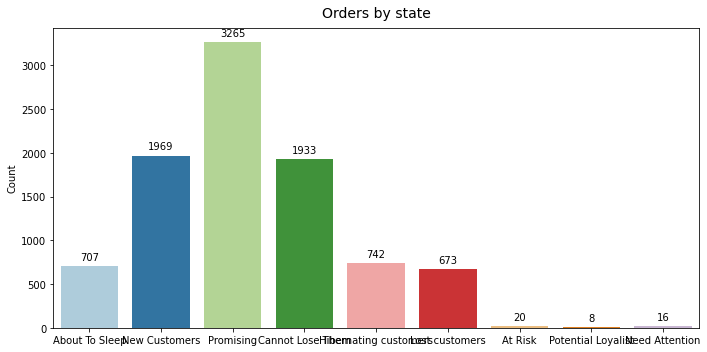

In [25]:
# Creating a plot to show number of orders by state
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, x = rfm_df['segment'], palette = 'Paired').set(xlabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Orders by state', fontdict = {'fontsize': 14}, pad = 10.5)
plt.ylabel('Count')

plt.tight_layout()